In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# read previously created csv file into datframe
df = pd.read_csv('C:\\Users\\phili\\Documents\\Downloads\\BrazilCapstone\\data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101270 entries, 0 to 101269
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      101270 non-null  int64  
 1   Customer ID     101270 non-null  object 
 2   Order_Id        101270 non-null  object 
 3   Order Date      101270 non-null  object 
 4   Price           101270 non-null  float64
 5   customer_state  101270 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.6+ MB


In [4]:
#drop unnamed column
df = df.drop('Unnamed: 0',axis=1)

In [5]:
# Columns contain no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101270 entries, 0 to 101269
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Customer ID     101270 non-null  object 
 1   Order_Id        101270 non-null  object 
 2   Order Date      101270 non-null  object 
 3   Price           101270 non-null  float64
 4   customer_state  101270 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.9+ MB


In [6]:
# Select the date for recency comparison 
reviewdate = pd.to_datetime(df['Order Date'].max())
print(reviewdate)

2018-09-03 00:00:00


In [7]:
# convert Order Date and create daysbetween column for recency calculation
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['recency'] = ((reviewdate - df['Order Date'])/ np.timedelta64(1, 'D')).astype(int)

In [8]:
#create frequncy column
frequency = df.groupby('Customer ID')['Order_Id'].nunique().reset_index()
df = df.merge(frequency, on='Customer ID')

In [9]:
#column monetary column
monetary = df.groupby('Customer ID')['Price'].sum().reset_index()
df = df.merge(monetary, on='Customer ID')

In [10]:
df.head()

,Customer ID,Order_Id_x,Order Date,Price_x,customer_state,recency,Order_Id_y,Price_y
0,7ac26eac431c6848694a2de6f0327524,00125cb692d04887809806618a2a145f,2017-03-23,109.9,GO,529,1,109.9
1,106106992030e0d83e6f1bc9d4054070,00571ded73b3c061925584feab0db425,2017-05-18,179.9,MG,473,1,179.9
2,fd01a8dd276ac93aec73fde385389de9,006dd93155bc2abd844cc5eed3a0fe7f,2017-12-02,49.9,SP,275,1,49.9
3,1d74273c053909be057f50f65b48522f,00946f674d880be1f188abc10ad7cf46,2017-12-09,99.9,SP,268,1,99.9
4,c7e193525b2825ccfe5c65875c0db1dc,00a0116ff15ff973ea16bee881208ae7,2018-02-18,149.0,MS,197,1,149.0


In [11]:
# rename columns accordingly
df = df.rename(columns = {'Order_Id_y':'frequency', 'Price_y':'monetary'})

In [12]:
df.head()

,Customer ID,Order_Id_x,Order Date,Price_x,customer_state,recency,frequency,monetary
0,7ac26eac431c6848694a2de6f0327524,00125cb692d04887809806618a2a145f,2017-03-23,109.9,GO,529,1,109.9
1,106106992030e0d83e6f1bc9d4054070,00571ded73b3c061925584feab0db425,2017-05-18,179.9,MG,473,1,179.9
2,fd01a8dd276ac93aec73fde385389de9,006dd93155bc2abd844cc5eed3a0fe7f,2017-12-02,49.9,SP,275,1,49.9
3,1d74273c053909be057f50f65b48522f,00946f674d880be1f188abc10ad7cf46,2017-12-09,99.9,SP,268,1,99.9
4,c7e193525b2825ccfe5c65875c0db1dc,00a0116ff15ff973ea16bee881208ae7,2018-02-18,149.0,MS,197,1,149.0


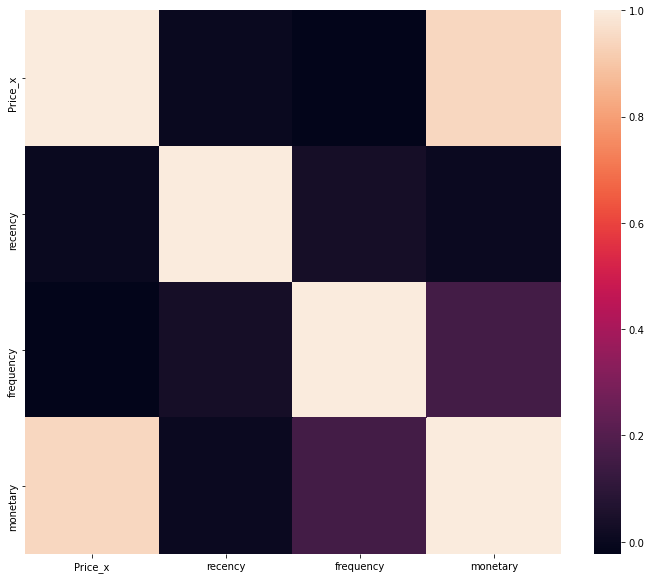

In [13]:
# Generate a heatmap from df
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr());

Based on the above generated heatmap, the customers from the website are buying frequently but not spending a large amount on a per customer basis. I will attempt to predict if these trend continyues in the future, if so I will further attempt to address the cause.